<a href="https://colab.research.google.com/github/lmkelly16/BYU-REU-2022/blob/main/Kimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import numpy as np
import glob
import gdal

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/BYU_REU_images/Kimage.tiff'

In [4]:
# Load the phase contrast image.
im = skimage.io.imread(path)

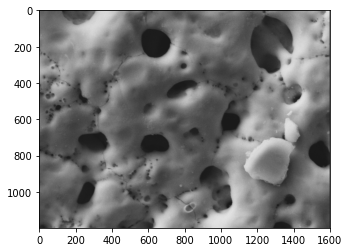

In [5]:
plt.imshow(im);

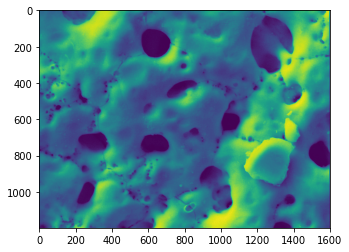

In [9]:
cim = im[:,:,0]
plt.imshow(cim)

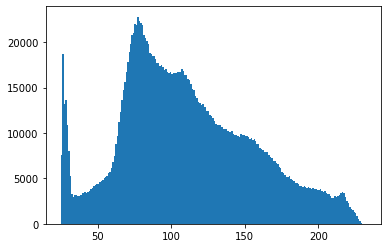

In [12]:
# forcing bins to be discretized by integer value
bins = np.arange(cim.min(), cim.max(), 1)

# plot histogram
plt.hist(cim.flatten(), bins=bins);

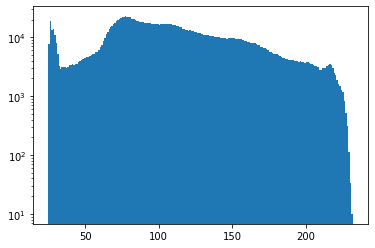

In [11]:
''' segmenting '''
# make a histogram to determine where to threshold

# forcing bins to be discretized by integer value
bins = np.arange(cim.min(), cim.max(), 1)

# plot histogram
plt.hist(cim.flatten(), bins=bins)

# use the log of the graph
plt.yscale("log");

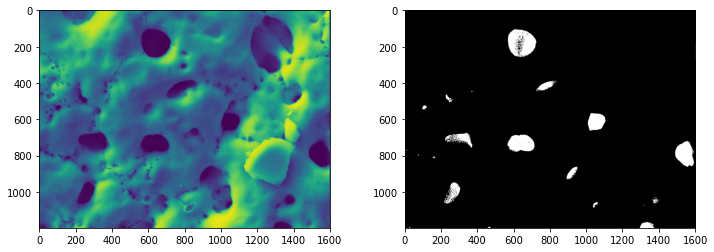

In [50]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 30

# Generate thresholded image
im_bw = cim < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim)
ax[1].imshow(im_bw, cmap=plt.cm.gray);

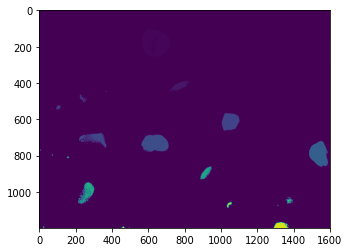

In [51]:
''' Labeling a segmented image '''

# labels whatever you segmented out (bacteria for example)
labeled = skimage.measure.label(im_bw)
plt.imshow(labeled);

In [54]:
labeled.max()

135

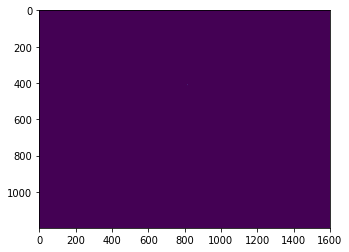

In [66]:
x = (labeled == 13)
plt.imshow(x);